## This is a rework of HW3_ assignment 2 for the purposes of the authorea analysis. 


**Fire off a Jupyter notebook with Jupyter Hub --here for Mac and Linux and here for Windows-- and switch to the Kernel PUI2016_Python2 or PUI2016_Python3 from the Jupyter dropdown menu under Kernels -> Change Kernel.**

Write a Jupyter Notebook on compute. This will require you to use the JupyterHub (instructions here ). Write a notebook that:


**1. States the question you want to ask, and 2. formulates the Null and 3. Alternative hypothesis (remember the confidence level!)**


**Use pandas to read in the CitiBike files, either from the DF, or locally, but you must be able to download them on the spot (so the TA can reproduce your work).**


**Display the top few rows of the DF in your notebook. This table must be rendered.**


**Display the reducted dataframe. This table must be rendered.**


**Plot your data distributions.**

In [11]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%pylab inline
import csv
import requests
import zipfile


Populating the interactive namespace from numpy and matplotlib


In [12]:
os.getenv("PUIDATA") 

'/home/cusp/dlk253/PUIdata'

In [19]:
#downloading the data
datestring = '201502'
#bring in the citybike data from Feb 2015
!curl -O "https://s3.amazonaws.com/tripdata/{datestring}-citibike-tripdata.zip"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4708k  100 4708k    0     0  9959k      0 --:--:-- --:--:-- --:--:-- 14.7M


In [20]:
#unzipping and putting into PUIDATA
zip_ref = zipfile.ZipFile(datestring+"-citibike-tripdata.zip", 'r')
zip_ref.extractall(os.getenv("PUIDATA"))

In [62]:
#opening CSV and plotting the head
df = pd.read_csv(zip_ref.open(datestring+'-citibike-tripdata.csv'))
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1


In [63]:
#dropping all of the columns by column number except for trip duration and birth year
df.drop(df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11 ,12 ,14]], axis=1,inplace=True)
df.head()

,tripduration,birth year
0,801,1978.0
1,379,1993.0
2,2474,1969.0
3,818,1985.0
4,544,1957.0


In [64]:
#calculating the age
df['age'] = 2016 - df['birth year']

In [65]:
df.tail()

,tripduration,birth year,age
196925,747,1990.0,26.0
196926,204,1971.0,45.0
196927,675,1985.0,31.0
196928,651,1992.0,24.0
196929,636,1995.0,21.0


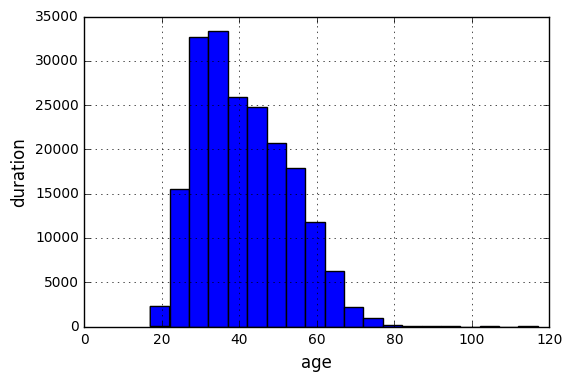

In [71]:
#plotting the mean duration for each age as a histogram
df['age'].hist(bins=20)
pl.ylabel("duration", fontsize = 12)
pl.xlabel("age", fontsize = 12)

In [67]:
#this part of the code I got from Christian Rosado
df['over 40'] = df['age'] > 40
df


,tripduration,birth year,age,over 40
0,801,1978.0,38.0,False
1,379,1993.0,23.0,False
2,2474,1969.0,47.0,True
3,818,1985.0,31.0,False
4,544,1957.0,59.0,True
5,717,1979.0,37.0,False
6,1306,1983.0,33.0,False
7,913,1955.0,61.0,True
8,759,1985.0,31.0,False
9,585,1982.0,34.0,False


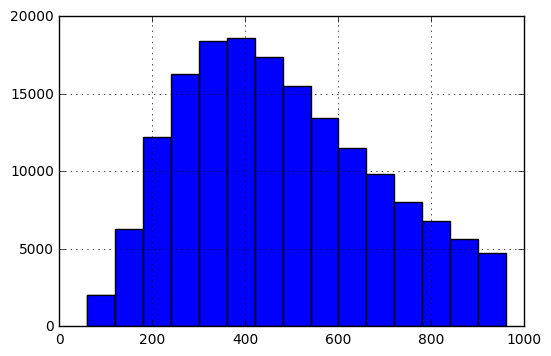

In [73]:
#this part of the code I got from Christian Rosado
s = 60
df['tripduration'].hist(bins=[s, 2*s, 3*s, 4*s, 5*s, 6*s, 7*s, 8*s, 9*s, 10*s, 11*s, 12*s, 13*s, 14*s, 15*s, 16*s])

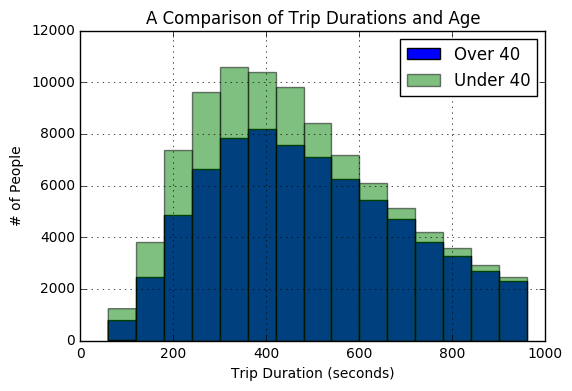

In [77]:
#this part of the code I got from Christian Rosado
(df['tripduration'][df['over 40'] == True]).hist(bins=(s, 2*s, 3*s, 4*s, 5*s, 6*s, 7*s, 8*s, 9*s, 10*s, 11*s, 12*s, 13*s, 14*s, 15*s, 16*s), label="Over 40")
(df['tripduration'][df['over 40'] == False]).hist(bins=(s, 2*s, 3*s, 4*s, 5*s, 6*s, 7*s, 8*s, 9*s, 10*s, 11*s, 12*s, 13*s, 14*s, 15*s, 16*s), alpha=0.5, label="Under 40")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("# of People")
plt.title("A Comparison of Trip Durations and Age")
plt.legend()